In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('data.csv')

In [3]:
df_data.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,name,neighbourhood,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,t,t,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,t,f,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,t,t,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,t,t,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,t,t,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,t,t,2017-06-07,t,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,t,f,2017-03-03,t,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,t,t,2013-05-18,f,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,t,f,2015-06-04,f,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,t,f,2017-03-12,t,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,1.0,1.0


**As we can see, data contains 22 features.**

In [4]:
len(df_data)

74111

**We have 74111 records in our data of people registered their place on Airbnb in different city of United States.**

## Lets check for any missing values

In [5]:
for column in df_data:
    if (df_data[column].isnull().any()):
        print(column)

bathrooms
host_has_profile_pic
host_identity_verified
host_since
neighbourhood
bedrooms
beds


Above shows we have 7 column which contain missing values.

Lets gets in depth about missing values.

In [6]:
df_data.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                  200
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic       188
host_identity_verified     188
host_since                 188
instant_bookable             0
latitude                     0
longitude                    0
name                         0
neighbourhood             6872
bedrooms                    91
beds                       131
dtype: int64

For filling the missing values in neighbourhood column

In [7]:
len(df_data['neighbourhood'].unique())

620

In [8]:
df_data['neighbourhood'].unique()

array(['Brooklyn Heights', "Hell's Kitchen", 'Harlem', 'Lower Haight',
       'Columbia Heights', 'Noe Valley', nan, 'Downtown',
       'Richmond District', 'Alphabet City', 'Hermosa Beach', 'Torrance',
       'U Street Corridor', 'Humboldt Park', 'Wicker Park',
       'South Boston', 'Lower East Side', 'Flatbush', 'Sherman Oaks',
       'East Flatbush', 'Valley Glen', 'Dupont Circle', 'Jamaica',
       'Forest Hills', 'Murray Hill', 'Lefferts Garden', 'Mid-Wilshire',
       'Venice', 'West Hollywood', 'Brownsville', 'Williamsburg',
       'East Village', 'South Loop/Printers Row', 'Westlake',
       'Hollywood Hills', 'Upper East Side', 'Bushwick',
       'Bedford-Stuyvesant', 'Pilsen', 'Chelsea', 'Sunnyside',
       'Greenwich Village', 'Washington Heights', 'Pasadena',
       'Potrero Hill', 'Brookland', 'Los Feliz', 'Hollywood',
       'Midtown East', 'Glendale', 'Park Slope', 'Arcadia',
       'West Village', 'Astoria', 'Portola', 'Burbank', 'East Harlem',
       'Silver Lake', 'H

Since we have 620 unique values. We now left with two options either to fill values using missing values or drop the columns. Since the missing value is approx **10%** we can fill all the missing value with unique values.

In [9]:
df_data1 = df_data.drop('neighbourhood',1)
df_data1

    


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,name,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Enjoy travelling during your stay in Manhattan...,t,f,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,The Oasis comes complete with a full backyard ...,t,t,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,This light-filled home-away-from-home is super...,t,t,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,"Cool, cozy, and comfortable studio located in ...",t,t,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,one room in bushwick apt,t,t,2013-03-24,f,40.709025,-73.939405,one room bushwick,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,"Located on the Pacific Coast Highway, this apa...",t,f,2016-05-03,f,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,A modern apartment located in East Williamsbur...,t,t,2012-01-05,t,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,"Fully renovated, designer's studio located in ...",t,f,2017-09-17,t,40.738535,-74.000157,Designer's Apartment in HEART of NYC,0.0,2.0


For filling missing values in **Beds, Bedrooms and Bathrooms** columns we can put the mode value.

In [10]:
df_data1['bedrooms'].mode()

0    1.0
dtype: float64

In [11]:
df_data1['beds'].mode()

0    1.0
dtype: float64

In [12]:
df_data1['bathrooms'].mode()

0    1.0
dtype: float64

In [13]:
df_data1['beds'].fillna(1.0, inplace = True)
df_data1['bedrooms'].fillna(1.0, inplace = True)
df_data1['bathrooms'].fillna(1.0, inplace = True)

For filling the two columns of **Host has profile pic** and **Host identity verified** we can use the mostly used value.

In [14]:
df_data1['host_has_profile_pic'].describe()

count     73923
unique        2
top           t
freq      73697
Name: host_has_profile_pic, dtype: object

In [15]:
df_data1['host_identity_verified'].describe()

count     73923
unique        2
top           t
freq      49748
Name: host_identity_verified, dtype: object

In [16]:
df_data1['host_has_profile_pic'].fillna('t', inplace = True)
df_data1['host_identity_verified'].fillna('t', inplace = True)

In [17]:
len(df_data1['host_since'].unique())

3088

We can drop the Host since column as price does not depend on this column.

In [18]:
data = df_data1.drop('host_since',1)

In [19]:
data.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
bedrooms                  0
beds                      0
dtype: int64

**As we can see we have filled all the missing values in our tables.**

Coming to the info of the table i.e basics information.

In [20]:
data.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
host_has_profile_pic       object
host_identity_verified     object
instant_bookable           object
latitude                  float64
longitude                 float64
name                       object
bedrooms                  float64
beds                      float64
dtype: object

**Our data consists of objects, int and float datatype features.**

In [21]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.234628,38.445958,-92.397525,1.265467,1.709611
std,6.081735e+06,0.717394,2.153589,0.581386,3.080167,21.705322,0.851671,1.253389
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,10.000000,18.000000


In [22]:
data.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name
count,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111
unique,35,3,67122,5,5,6,73474,2,2,2,73350
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",t,t,f,#NAME?
freq,49003,41310,586,72028,32374,32349,8,73885,49936,54660,10


### Important observations:

* Around 40% of the records are from new york city.
* Around 70% of the records property type is apartment.
* Around 95% of the records contains bed_type as real bed.
* 99% of host has profile picture.
* 60% host identity is verified.
    


In [23]:
import sweetviz as sv

In [24]:
report = sv.analyze(data)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Keypoints:
* 60% of property available on Airbnb in US is apartment.
* 56% of room type on Airbnb in US is entire home/apt.
* 40% of properties can make accomodation for 2 peoples.
* 80% of properties has 1 washroom.
* Almost all the property is furnished and has atleast bed.
* 44% of host charges for concellation.
* 73% of host charges cleaning fees.
* 70% of records are from new york and los angeles whereas new york contain 40% of all roecords.
* 26% of host provide instant booking serivce.
* 67% properties contain one bedrooms.
* 60% properties has just one bed in the property.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plot

In [26]:
cityVlog_price = data[['city', 'log_price']].groupby(['city'], as_index=False).mean().sort_values(by='city',ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

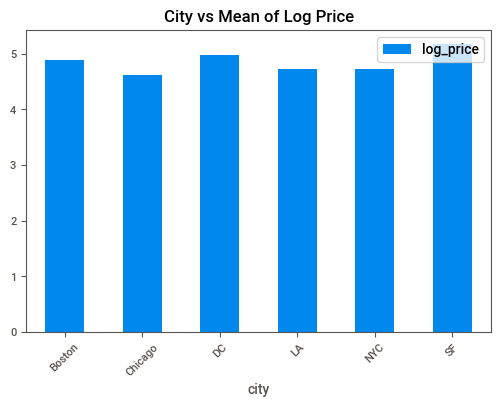

In [27]:
cityVlog_price.plot.bar(x='city', y='log_price', rot=45, title="City vs Mean of Log Price");
plot.show

**As we can see that most of the expensive properties on Airbnb within US is in San Francisco.**

In [28]:
data[['property_type', 'log_price']].groupby(['property_type'],
                                             as_index=False).mean().sort_values(by='log_price',ascending=False).head(10)

,property_type,log_price
27,Timeshare,5.602600
21,Lighthouse,5.521461
32,Vacation home,5.420951
8,Castle,5.368424
13,Earth House,5.285391
28,Tipi,5.246118
30,Train,5.204399
2,Boat,5.200865
25,Serviced apartment,5.147467
33,Villa,5.112427


As we can see that different type of property has different log price. The highest price is of **Timeshare**.

<function matplotlib.pyplot.show(close=None, block=None)>

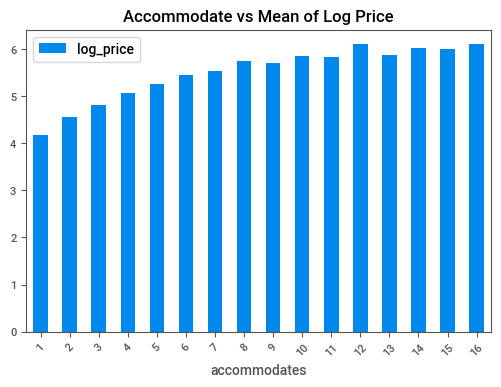

In [29]:
accoVslog_price = data[['accommodates', 'log_price']].groupby(['accommodates'], as_index=False).mean()
accoVslog_price.plot.bar(x='accommodates', y='log_price', rot=45, title="Accommodate vs Mean of Log Price");
plot.show

**From the above graph, we can see that the price varies linearly with increase in number of accommodates.**

<function matplotlib.pyplot.show(close=None, block=None)>

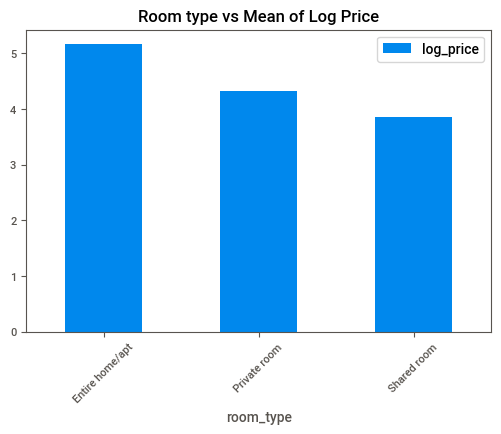

In [30]:
room_typeVsLog_price = data[['room_type', 'log_price']].groupby(['room_type'], as_index=False).mean()
room_typeVsLog_price.plot.bar(x='room_type', y='log_price', rot=45, title="Room type vs Mean of Log Price");
plot.show

It is clearly seeen that price varies for different room type and Entire home has the maximum price.

<function matplotlib.pyplot.show(close=None, block=None)>

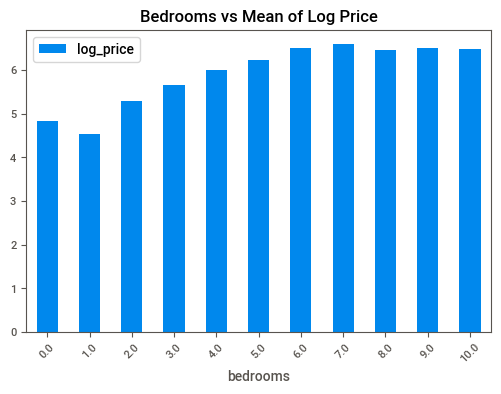

In [31]:
bedroomsVsLog_price = data[['bedrooms', 'log_price']].groupby(['bedrooms'], as_index=False).mean()
bedroomsVsLog_price.plot.bar(x='bedrooms', y='log_price', rot=45, title="Bedrooms vs Mean of Log Price");
plot.show

**As we can see that their is some dip in graph between no bedroom in house till 1 bedroom and after thatthe price is increasing as the bedroom count is increasing.**

<function matplotlib.pyplot.show(close=None, block=None)>

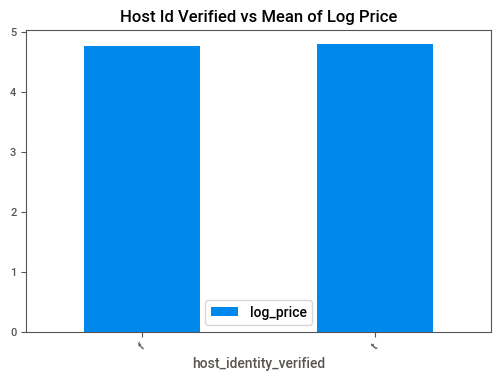

In [32]:
hostIdVVsLog_price = data[['host_identity_verified', 'log_price']].groupby(['host_identity_verified'], as_index=False).mean()
hostIdVVsLog_price.plot.bar(x='host_identity_verified', y='log_price', rot=45, title="Host Id Verified vs Mean of Log Price");
plot.show

**As we can see that price is not effected by whether the host identity is verified or not.**

<function matplotlib.pyplot.show(close=None, block=None)>

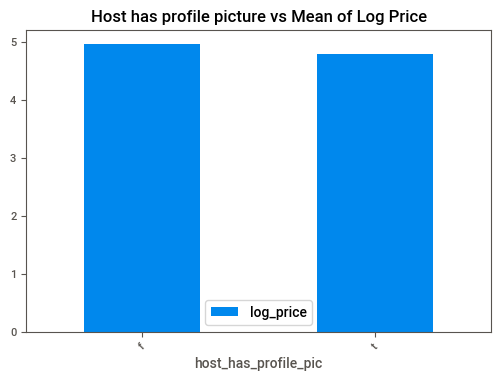

In [33]:
host_has_profile_picVsLog_price = data[['host_has_profile_pic', 'log_price']].groupby(['host_has_profile_pic'], as_index=False).mean()
host_has_profile_picVsLog_price.plot.bar(x='host_has_profile_pic', y='log_price', rot=45, title="Host has profile picture vs Mean of Log Price");
plot.show

Since the data shows that the host which dont have picture has high price. It could be because of just 226 cases of not having profile picture among 74000 cases. 

<function matplotlib.pyplot.show(close=None, block=None)>

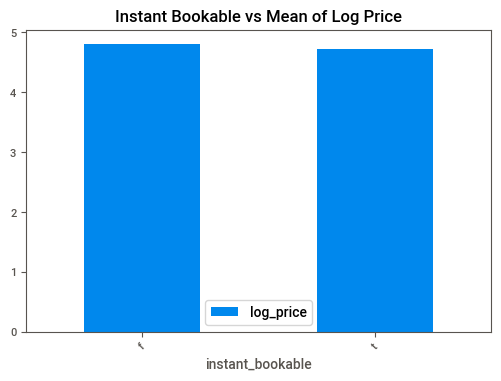

In [34]:
instant_bookableVsLog_price = data[['instant_bookable', 'log_price']].groupby(['instant_bookable'], as_index=False).mean()
instant_bookableVsLog_price.plot.bar(x='instant_bookable', y='log_price', rot=45, title="Instant Bookable vs Mean of Log Price");
plot.show

**As we can see that price is not effected by whether the instant booking feature is available or not.**

### Summary:
* Sanfrancisco is expensive i.e have high prices among other states.
* Different type of property has different price.
* Prices increse linearly with increase in number of accommodates.
* Entire home/apt is expensive among private room and shared room.
* Prices increase with increase in number of bedrooms.
* Host id verified or not does not effect the price.
* Host has profile picture also does not effect the price as we have just 226 cases of no profile picture.
* Instant booking feature does not effect the price as it is similar for both cases (i.e available or not).

**Lets try to look at some correlations:**

In [35]:
data.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.004058,-0.003059,-0.003021,-0.001379,-0.007578,-0.008876
log_price,-0.007178,1.000000,0.567574,0.355174,0.111191,-0.002193,-0.047529,0.473028,0.441953
accommodates,-0.005759,0.567574,1.000000,0.505490,0.182306,-0.078309,-0.085160,0.709214,0.810247
bathrooms,-0.004058,0.355174,0.505490,1.000000,0.054134,-0.137673,-0.134777,0.589783,0.525699
cleaning_fee,-0.003059,0.111191,0.182306,0.054134,1.000000,-0.060913,-0.068505,0.105491,0.132089
latitude,-0.003021,-0.002193,-0.078309,-0.137673,-0.060913,1.000000,0.896065,-0.059128,-0.080135
longitude,-0.001379,-0.047529,-0.085160,-0.134777,-0.068505,0.896065,1.000000,-0.076093,-0.082045
bedrooms,-0.007578,0.473028,0.709214,0.589783,0.105491,-0.059128,-0.076093,1.000000,0.709186
beds,-0.008876,0.441953,0.810247,0.525699,0.132089,-0.080135,-0.082045,0.709186,1.000000


<AxesSubplot:>

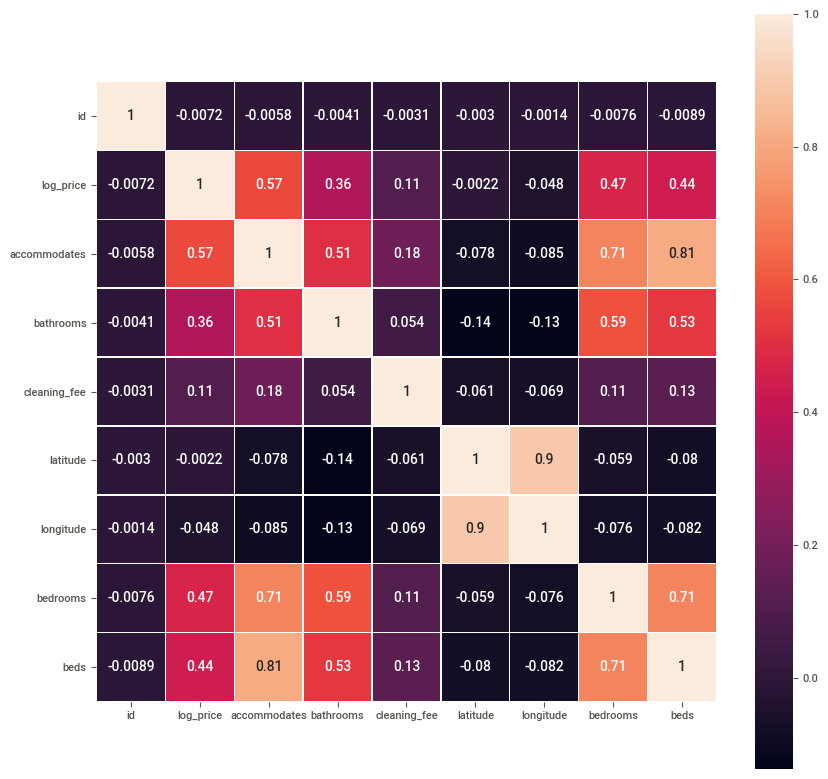

In [36]:
plot.figure(figsize=(10, 10))
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0,square=True,annot=True)

### Overview from correlation table:
* It can be seen that **accommodates** is highly correlated with **beds**.
* It can also be seen that **beds** has high correlation with **bedrooms**.
* It can also be seen that **beds** has high correlation with **accommodates**.

### Now as per our findings we can delete multiple columns as shown below:

* **Instant bookable** can be dropped as it does not effect the price on booking as see from above graph (Instant bookable vs Log Price).
* **Host id verified** can be dropped as it does not effect the price on booking as see from above graph (Host id verified vs Log Price).
* **Host has profile picture** can be dropped as it does not effect the price on booking as see from above graph (Host has profile picture vs Log Price).
* **Id** can be dropped as price does not depend on id.
* **Name** can be dropped as price does not depend on name of the property.

In [37]:
final_data = data.drop(['instant_bookable','host_has_profile_pic','host_identity_verified',"description",'name','id'],1)
final_data.head(10)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,latitude,longitude,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,40.696524,-73.991617,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,40.766115,-73.989040,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,40.808110,-73.943756,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,37.772004,-122.431619,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,38.925627,-77.034596,0.0,1.0
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,37.753164,-122.429526,1.0,1.0
6,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,33.980454,-118.462821,1.0,1.0
7,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,34.046737,-118.260439,1.0,1.0
8,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,37.781128,-122.501095,1.0,1.0
9,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,LA,33.992563,-117.895997,1.0,1.0


In [38]:
from sklearn.preprocessing import LabelEncoder
output = final_data.apply(LabelEncoder().fit_transform)
output.head(10)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,latitude,longitude,bedrooms,beds
0,142,0,0,6142,2,2,4,2,1,4,43883,42956,1,1
1,161,0,0,6269,6,2,4,2,1,4,59280,44041,3,3
2,137,0,0,21345,4,2,4,1,1,4,63880,60625,1,3
3,586,17,0,38854,3,2,4,0,1,5,25953,2689,2,2
4,107,0,0,55413,1,2,4,1,1,2,33179,34256,0,1
5,77,0,1,50079,1,2,4,2,1,5,24138,2918,1,1
6,75,0,0,63351,2,2,4,1,1,3,2894,9842,1,1
7,112,11,0,22670,1,2,4,1,1,3,8367,23600,1,1
8,112,17,1,22639,1,2,4,1,1,5,27046,137,1,1
9,28,17,1,3774,1,2,4,1,1,3,4050,28398,1,1


### Now, our data is ready, Lets create the model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

In [40]:
X = output.drop('log_price', axis=1)
y = output.log_price

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=1)

**Lets see how the linear regression model behaves on our data**

In [41]:
linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_train_pred = linear_model.predict(X_train)

In [43]:
print("Accuracy on test data: "+str(r2_score(y_train, y_train_pred)))

Accuracy on test data: 0.48399211461517666


In [44]:
y_test_pred = linear_model.predict(X_test)
print("Accuracy on test data: "+str(r2_score(y_test, y_test_pred)))

Accuracy on test data: 0.4807618092709939


### Since the accuracy comes out to be 48% for linear regression for both training and testing data.

### Lets try to find out using higher polynomial in regression model

Lets check accuracy for degree 2 polynomial in linear regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)
r2_train = r2_score(y_train,y_poly_pred)
print("Accuracy on train data: "+str(r2_train))


x_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred_test = model.predict(x_poly_test)
r2_test = r2_score(y_test,y_poly_pred_test)
print("Accuracy on test data: "+str(r2_test))

Accuracy on train data: 0.5566164646339293
Accuracy on test data: 0.5512800980022872


Lets check accuracy for degree 3 polynomial in linear regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)
r2_train = r2_score(y_train,y_poly_pred)
print("Accuracy on train data: "+str(r2_train))


x_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred_test = model.predict(x_poly_test)
r2_test = r2_score(y_test,y_poly_pred_test)
print("Accuracy on test data: "+str(r2_test))

Accuracy on train data: 0.6073455979321196
Accuracy on test data: 0.5886003294863122


So we can conclude that the all the 3 models shown above have different accuracy. 
* Linear regression = 48%
* Polynomial regression accuracy with degree 2 = 55%
* Polynomial regression accuracy with degree 3 = 60%

Lets see how predicted value looks like when compared with original price of AirBnb using our model (Polynomial regression with degree 3) i.e the model which we will be using as it has the highest accuracy.

In [47]:
df = pd.DataFrame({'Actual Price': y_train, 'Predicted Price': y_poly_pred})
df.head(10)

,Actual Price,Predicted Price
13090,231,269.220065
56110,467,213.442294
69196,91,115.028495
42310,242,212.968084
25032,142,156.632344
16804,32,44.267552
11877,112,103.732487
19823,242,240.460431
73881,188,160.603645
25700,586,384.872207


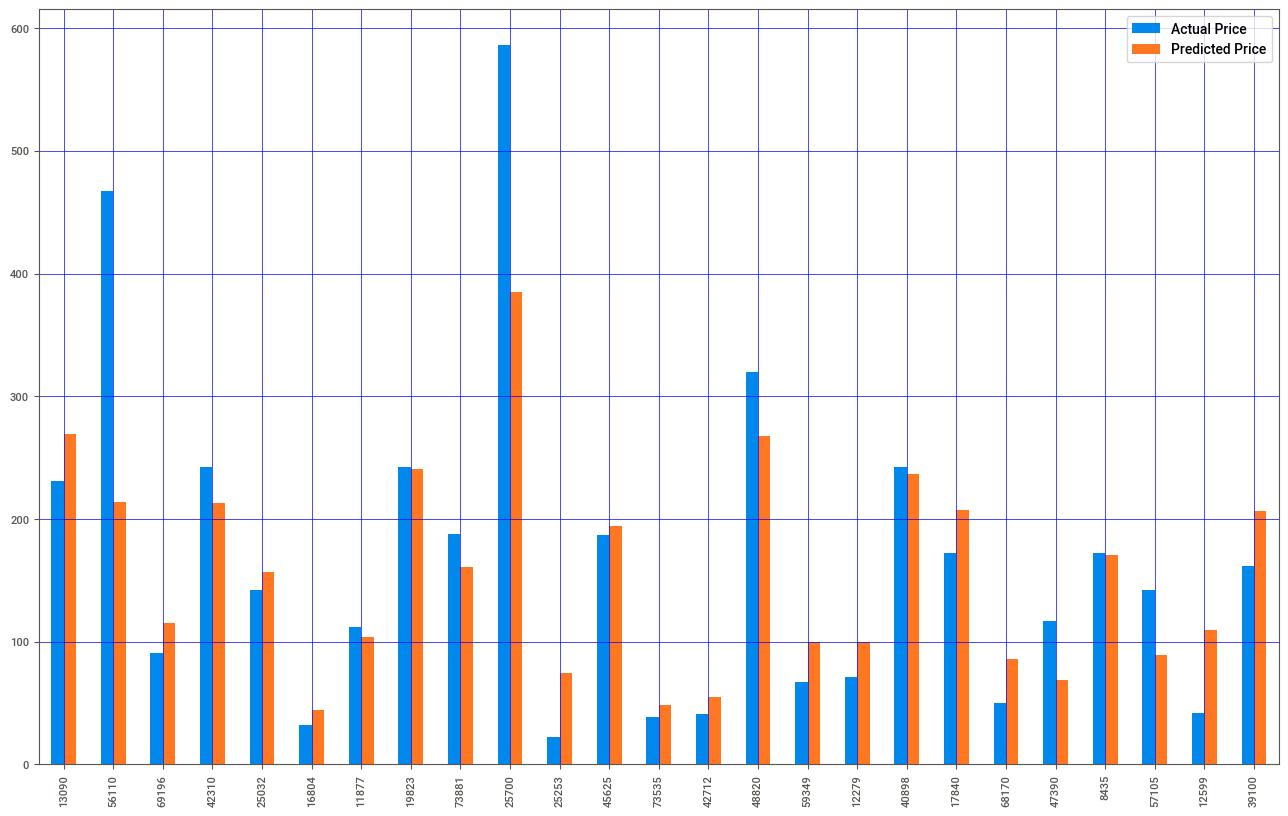

In [48]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plot.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plot.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plot.show()

As seen from above graph our model looks good as we are 60% accurate.